# Objective
-To predict rain on the next day.
- since XGBClassifier gives beter performance it is the best model

# Loading required Libraries

In [1]:
##  Libraries Used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

# Loading Dataset

In [2]:
## Loading dataset
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Checks on data

In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df.describe()
# in 'Summer season' chance of rainfall is low and have evaporation rate, Sunshine,temperature and low humidity
# in rainy season  chances rainfall is high ,clouds and low eavaporation rate , less Sunshine, high humidity
## let us consider wind direction is same as that of previous day

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#  Treating of missing values

In [ ]:
def missing_value(x):
    x=x.fillna()
    x=clip(upper)
    return x
    
    

In [ ]:
df = df.apply(missing_value)

In [7]:
df.MinTemp.bfill(inplace=True)
df.MaxTemp.bfill(inplace=True)
df.WindGustDir.bfill(inplace=True)
df.WindDir3pm.bfill(inplace=True)
df.WindDir9am.bfill(inplace=True)
df.MinTemp.bfill(inplace=True)
df.MaxTemp.bfill(inplace=True)
df.RainToday.bfill(inplace=True)
df.RainTomorrow.bfill(inplace=True)

In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              1
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir          1
WindGustSpeed    10263
WindDir9am           0
WindDir3pm           0
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday            0
RainTomorrow         1
dtype: int64

In [9]:
df.shape

(145460, 23)

In [10]:
df.Location.value_counts().sum

<bound method Series.sum of Canberra            3436
Sydney              3344
Melbourne           3193
Perth               3193
Brisbane            3193
Darwin              3193
Adelaide            3193
Hobart              3193
Bendigo             3040
Ballarat            3040
Townsville          3040
Wollongong          3040
GoldCoast           3040
Cairns              3040
MountGambier        3040
Albury              3040
AliceSprings        3040
Albany              3040
MountGinini         3040
Launceston          3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
Richmond            3009
Cobar               3009
Woomera             3009
SydneyAirport       3009
PearceRAAF          3009
Moree               3009
Mildura             3009
Witchcliffe         3009
Watsonia            3009
NorfolkIsland       3009
Sale                3009
PerthAirport        3009
Portland            3009
Williamtown         3009
MelbourneAirport    3009
BadgerysCreek       30

In [11]:
df.Sunshine.value_counts()

0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64

In [12]:
df.WindGustDir.value_counts()

SSE    13367
SSW    11952
W      10112
SE      9602
SW      9486
N       9422
E       9391
S       9302
WSW     9231
WNW     8455
NW      8417
ENE     8260
ESE     7741
NE      7261
NNE     6741
NNW     6719
Name: WindGustDir, dtype: int64

In [13]:
df.WindDir9am.value_counts()

N      12782
SE     10022
NW      9854
SSE     9824
E       9720
S       9263
SW      9105
W       8865
NNE     8826
NNW     8633
NE      8550
ENE     8422
SSW     8066
ESE     8020
WNW     7860
WSW     7648
Name: WindDir9am, dtype: int64

In [14]:
df.WindDir3pm.value_counts()

SE     11186
S      10344
W      10327
SSE    10167
WSW     9616
SW      9463
NE      9115
N       9039
WNW     9027
NW      8916
ESE     8793
E       8582
SSW     8301
NNW     7977
ENE     7940
NNE     6667
Name: WindDir3pm, dtype: int64

In [15]:
df[['WindGustDir','WindDir9am','WindDir3pm']]

,WindGustDir,WindDir9am,WindDir3pm
0,W,W,WNW
1,WNW,NNW,WSW
2,WSW,W,WSW
3,NE,SE,E
4,W,ENE,NW
...,...,...,...
145455,E,SE,ENE
145456,NNW,SE,N
145457,N,SE,WNW
145458,SE,SSE,N


In [16]:
df[['Pressure9am','Pressure3pm']].corr()
# Thses are corelated

,Pressure9am,Pressure3pm
Pressure9am,1.000000,0.961326
Pressure3pm,0.961326,1.000000


In [17]:
df.Sunshine.value_counts()

0.0     2359
10.7    1101
11.0    1094
10.8    1069
10.5    1027
        ... 
14.0      15
14.1       6
14.3       4
14.2       2
14.5       1
Name: Sunshine, Length: 145, dtype: int64

In [18]:
##let us  create new datframes where RainToday  is 'No' 
df1=df[(df['RainToday']=='No')&(df['MaxTemp']>=35)]
df2=df[(df['RainToday']=='No')&(df['MaxTemp']>=28)&(df['MaxTemp']<35)]
df3=df[(df['RainToday']=='No')&(df['MaxTemp']>=20)&(df['MaxTemp']<28)]
df4=df[(df['RainToday']=='No')&(df['MaxTemp']>=10)&(df['MaxTemp']<20)]
df5=df[(df['RainToday']=='No')&(df['MaxTemp']<10)]


In [19]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
35,2009-01-05,Albury,12.9,35.8,0.0,NaN,NaN,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,NaN,NaN,22.4,34.4,No,No
36,2009-01-06,Albury,13.7,37.9,0.0,NaN,NaN,W,52.0,SE,...,33.0,8.0,1010.9,1006.7,NaN,NaN,23.1,36.8,No,No
37,2009-01-07,Albury,16.1,38.9,0.0,NaN,NaN,W,57.0,E,...,34.0,12.0,1007.0,1002.7,NaN,NaN,25.2,38.4,No,No
43,2009-01-13,Albury,17.2,37.7,0.0,NaN,NaN,NNW,35.0,SE,...,51.0,19.0,1015.7,1010.9,NaN,NaN,24.3,35.7,No,No
44,2009-01-14,Albury,17.4,43.0,0.0,NaN,NaN,NW,39.0,SSE,...,40.0,8.0,1011.6,1006.9,NaN,NaN,25.6,41.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145367,2017-03-25,Uluru,21.3,40.6,0.0,NaN,NaN,E,35.0,ESE,...,21.0,11.0,1010.0,1005.3,NaN,NaN,29.7,38.9,No,No
145368,2017-03-26,Uluru,18.4,41.6,0.0,NaN,NaN,NNW,37.0,ESE,...,20.0,9.0,1008.7,1005.1,NaN,NaN,28.6,40.4,No,No
145369,2017-03-27,Uluru,25.3,37.6,0.0,NaN,NaN,SSE,50.0,SSE,...,44.0,28.0,1010.5,1008.7,NaN,NaN,30.6,35.9,No,No
145370,2017-03-28,Uluru,24.1,37.0,0.0,NaN,NaN,E,35.0,ESE,...,30.0,20.0,1013.1,1008.7,NaN,1.0,27.4,36.1,No,No


In [20]:
df1.mean()

MinTemp            19.914201
MaxTemp            37.934297
Rainfall            0.017811
Evaporation        11.377888
Sunshine           11.020334
WindGustSpeed      45.829418
WindSpeed9am       15.592400
WindSpeed3pm       18.594615
Humidity9am        41.685320
Humidity3pm        21.131363
Pressure9am      1012.325795
Pressure3pm      1008.746446
Cloud9am            2.412723
Cloud3pm            3.272575
Temp9am            27.594620
Temp3pm            35.972080
dtype: float64

In [21]:
## fill the na values
df1.fillna(df1.mean(),inplace=True)
df2.fillna(df2.mean(),inplace=True)
df3.fillna(df3.mean(),inplace=True)
df4.fillna(df4.mean(),inplace=True)
df5.fillna(df5.mean(),inplace=True)



/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
## Let us create new dataframes where RainToday is 'Yes'
df7=df[(df['RainToday']=='Yes')&(df['MaxTemp']>=35)]
df8=df[(df['RainToday']=='Yes')&(df['MaxTemp']>=28)&(df['MaxTemp']<35)]
df9=df[(df['RainToday']=='Yes')&(df['MaxTemp']>=20)&(df['MaxTemp']<28)]
df10=df[(df['RainToday']=='Yes')&(df['MaxTemp']>=10)&(df['MaxTemp']<20)]
df11=df[(df['RainToday']=='Yes')&(df['MaxTemp']<10)]


In [23]:
df7.fillna(df7.mean(),inplace=True)
df8.fillna(df8.mean(),inplace=True)
df9.fillna(df9.mean(),inplace=True)
df10.fillna(df10.mean(),inplace=True)
df11.fillna(df11.mean(),inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [24]:
df11

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
190,2009-06-09,Albury,6.3,8.8,2.0,2.125203,3.057143,W,43.0,NNW,...,92.0,95.0,1011.1,1008.3,8.0,8.0,6.8,7.9,Yes,Yes
920,2011-07-09,Albury,4.3,9.2,4.2,2.125203,3.057143,WNW,28.0,WNW,...,94.0,87.0,1022.2,1021.1,8.0,8.0,7.4,8.1,Yes,No
1241,2012-05-25,Albury,5.5,9.4,29.4,2.125203,3.057143,W,59.0,NNW,...,87.0,86.0,1011.4,1008.6,8.0,8.0,7.6,8.6,Yes,Yes
1269,2012-06-22,Albury,7.5,9.7,5.2,2.125203,3.057143,NNW,44.0,NNW,...,91.0,90.0,1006.6,1009.0,8.0,8.0,8.4,8.9,Yes,No
1278,2012-07-01,Albury,3.7,9.6,3.8,2.125203,3.057143,NW,26.0,N,...,100.0,91.0,1016.2,1014.7,8.0,8.0,6.5,8.2,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136648,2010-07-01,AliceSprings,7.7,9.3,8.2,0.400000,0.000000,E,22.0,ESE,...,95.0,95.0,1025.8,1024.0,8.0,8.0,7.9,9.2,Yes,Yes
136652,2010-07-05,AliceSprings,8.3,9.6,2.8,0.200000,0.000000,E,31.0,E,...,95.0,96.0,1022.4,1021.5,8.0,8.0,9.5,8.7,Yes,Yes
136653,2010-07-06,AliceSprings,6.2,7.0,36.0,0.600000,0.000000,ESE,39.0,E,...,94.0,95.0,1023.0,1021.5,8.0,8.0,6.2,6.2,Yes,Yes
136654,2010-07-07,AliceSprings,5.3,8.8,13.2,0.400000,1.100000,ESE,28.0,ESE,...,86.0,73.0,1024.4,1022.5,6.0,8.0,7.0,8.2,Yes,No


# Creating new DtaFrame after treating  missing Values

In [25]:
dff=pd.concat([df1,df2,df3,df4,df5,df7,df8,df9,df10,df11],ignore_index=True)

In [26]:
dff

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-05,Albury,12.9,35.8,0.0,11.377888,11.020334,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,2.412723,3.272575,22.4,34.4,No,No
1,2009-01-06,Albury,13.7,37.9,0.0,11.377888,11.020334,W,52.0,SE,...,33.0,8.0,1010.9,1006.7,2.412723,3.272575,23.1,36.8,No,No
2,2009-01-07,Albury,16.1,38.9,0.0,11.377888,11.020334,W,57.0,E,...,34.0,12.0,1007.0,1002.7,2.412723,3.272575,25.2,38.4,No,No
3,2009-01-13,Albury,17.2,37.7,0.0,11.377888,11.020334,NNW,35.0,SE,...,51.0,19.0,1015.7,1010.9,2.412723,3.272575,24.3,35.7,No,No
4,2009-01-14,Albury,17.4,43.0,0.0,11.377888,11.020334,NW,39.0,SSE,...,40.0,8.0,1011.6,1006.9,2.412723,3.272575,25.6,41.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2010-07-01,AliceSprings,7.7,9.3,8.2,0.400000,0.000000,E,22.0,ESE,...,95.0,95.0,1025.8,1024.0,8.000000,8.000000,7.9,9.2,Yes,Yes
145455,2010-07-05,AliceSprings,8.3,9.6,2.8,0.200000,0.000000,E,31.0,E,...,95.0,96.0,1022.4,1021.5,8.000000,8.000000,9.5,8.7,Yes,Yes
145456,2010-07-06,AliceSprings,6.2,7.0,36.0,0.600000,0.000000,ESE,39.0,E,...,94.0,95.0,1023.0,1021.5,8.000000,8.000000,6.2,6.2,Yes,Yes
145457,2010-07-07,AliceSprings,5.3,8.8,13.2,0.400000,1.100000,ESE,28.0,ESE,...,86.0,73.0,1024.4,1022.5,6.000000,8.000000,7.0,8.2,Yes,No


In [27]:
## checks on new datrframe
dff.isnull().sum()
## no missing values

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [28]:
dff.shape

(145459, 23)

In [29]:
dff.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145454,2010-07-01,AliceSprings,7.7,9.3,8.2,0.4,0.0,E,22.0,ESE,...,95.0,95.0,1025.8,1024.0,8.0,8.0,7.9,9.2,Yes,Yes
145455,2010-07-05,AliceSprings,8.3,9.6,2.8,0.2,0.0,E,31.0,E,...,95.0,96.0,1022.4,1021.5,8.0,8.0,9.5,8.7,Yes,Yes
145456,2010-07-06,AliceSprings,6.2,7.0,36.0,0.6,0.0,ESE,39.0,E,...,94.0,95.0,1023.0,1021.5,8.0,8.0,6.2,6.2,Yes,Yes
145457,2010-07-07,AliceSprings,5.3,8.8,13.2,0.4,1.1,ESE,28.0,ESE,...,86.0,73.0,1024.4,1022.5,6.0,8.0,7.0,8.2,Yes,No
145458,2014-07-13,AliceSprings,7.0,7.5,2.4,5.4,0.0,ESE,35.0,E,...,90.0,97.0,1024.8,1022.8,8.0,8.0,7.1,7.0,Yes,Yes


In [30]:
dff.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-05,Albury,12.9,35.8,0.0,11.377888,11.020334,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,2.412723,3.272575,22.4,34.4,No,No
1,2009-01-06,Albury,13.7,37.9,0.0,11.377888,11.020334,W,52.0,SE,...,33.0,8.0,1010.9,1006.7,2.412723,3.272575,23.1,36.8,No,No
2,2009-01-07,Albury,16.1,38.9,0.0,11.377888,11.020334,W,57.0,E,...,34.0,12.0,1007.0,1002.7,2.412723,3.272575,25.2,38.4,No,No
3,2009-01-13,Albury,17.2,37.7,0.0,11.377888,11.020334,NNW,35.0,SE,...,51.0,19.0,1015.7,1010.9,2.412723,3.272575,24.3,35.7,No,No
4,2009-01-14,Albury,17.4,43.0,0.0,11.377888,11.020334,NW,39.0,SSE,...,40.0,8.0,1011.6,1006.9,2.412723,3.272575,25.6,41.5,No,No


In [31]:
dff.to_csv('Final_aus_weather.csv')

# Visualisations

<AxesSubplot:xlabel='RainTomorrow', ylabel='Count'>

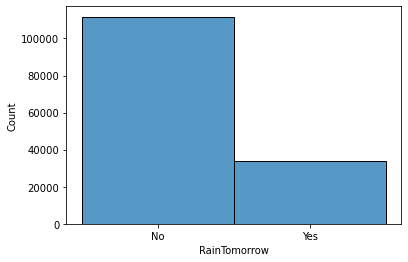

In [32]:
sns.histplot(dff['RainTomorrow'],)

<AxesSubplot:xlabel='RainToday', ylabel='Count'>

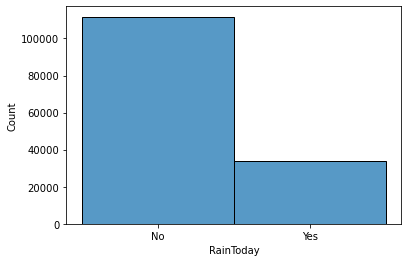

In [33]:
sns.histplot(df['RainToday'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='MaxTemp'>

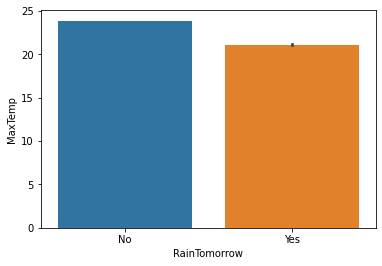

In [34]:
sns.barplot(x=dff['RainTomorrow'],y=dff['MaxTemp'])

<AxesSubplot:xlabel='RainTomorrow', ylabel='WindGustSpeed'>

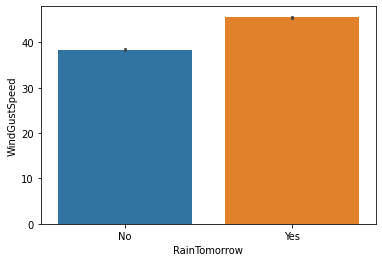

In [35]:
sns.barplot(x=dff['RainTomorrow'],y=dff['WindGustSpeed'])

<AxesSubplot:xlabel='Temp9am', ylabel='RainTomorrow'>

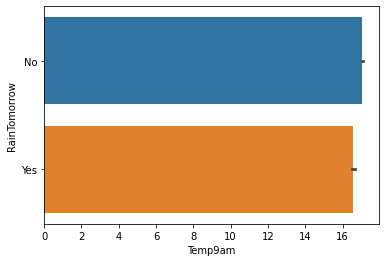

In [36]:
sns.barplot(x=dff['Temp9am'],y=dff['RainTomorrow'])

# Data Prepration

In [37]:
LE=LabelEncoder()
MS=MinMaxScaler()

In [38]:
dff.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [39]:
dff.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009-01-05,Albury,12.9,35.8,0.0,11.377888,11.020334,WNW,41.0,ENE,...,41.0,9.0,1012.6,1009.2,2.412723,3.272575,22.4,34.4,No,No
1,2009-01-06,Albury,13.7,37.9,0.0,11.377888,11.020334,W,52.0,SE,...,33.0,8.0,1010.9,1006.7,2.412723,3.272575,23.1,36.8,No,No
2,2009-01-07,Albury,16.1,38.9,0.0,11.377888,11.020334,W,57.0,E,...,34.0,12.0,1007.0,1002.7,2.412723,3.272575,25.2,38.4,No,No
3,2009-01-13,Albury,17.2,37.7,0.0,11.377888,11.020334,NNW,35.0,SE,...,51.0,19.0,1015.7,1010.9,2.412723,3.272575,24.3,35.7,No,No
4,2009-01-14,Albury,17.4,43.0,0.0,11.377888,11.020334,NW,39.0,SSE,...,40.0,8.0,1011.6,1006.9,2.412723,3.272575,25.6,41.5,No,No


In [40]:
dff.set_index('Date',inplace=True)

In [41]:
dff[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]=dff[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']].apply(LE.fit_transform)

In [42]:
dff

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-05,2,12.9,35.8,0.0,11.377888,11.020334,14,41.0,1,7,...,41.0,9.0,1012.6,1009.2,2.412723,3.272575,22.4,34.4,0,0
2009-01-06,2,13.7,37.9,0.0,11.377888,11.020334,13,52.0,9,14,...,33.0,8.0,1010.9,1006.7,2.412723,3.272575,23.1,36.8,0,0
2009-01-07,2,16.1,38.9,0.0,11.377888,11.020334,13,57.0,0,13,...,34.0,12.0,1007.0,1002.7,2.412723,3.272575,25.2,38.4,0,0
2009-01-13,2,17.2,37.7,0.0,11.377888,11.020334,6,35.0,9,7,...,51.0,19.0,1015.7,1010.9,2.412723,3.272575,24.3,35.7,0,0
2009-01-14,2,17.4,43.0,0.0,11.377888,11.020334,7,39.0,10,11,...,40.0,8.0,1011.6,1006.9,2.412723,3.272575,25.6,41.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-01,3,7.7,9.3,8.2,0.400000,0.000000,0,22.0,2,2,...,95.0,95.0,1025.8,1024.0,8.000000,8.000000,7.9,9.2,1,1
2010-07-05,3,8.3,9.6,2.8,0.200000,0.000000,0,31.0,0,0,...,95.0,96.0,1022.4,1021.5,8.000000,8.000000,9.5,8.7,1,1
2010-07-06,3,6.2,7.0,36.0,0.600000,0.000000,2,39.0,0,9,...,94.0,95.0,1023.0,1021.5,8.000000,8.000000,6.2,6.2,1,1


In [43]:
a=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

In [44]:
for i in a:
    dff[[i]]=MS.fit_transform(dff[[i]])

In [45]:
dff

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-05,2,0.504717,0.767486,0.000000,0.078468,0.760023,14,0.271318,1,7,...,0.41,0.09,0.530579,0.5136,0.268080,0.363619,0.624473,0.763916,0,0
2009-01-06,2,0.523585,0.807183,0.000000,0.078468,0.760023,13,0.356589,9,14,...,0.33,0.08,0.502479,0.4736,0.268080,0.363619,0.639241,0.809981,0,0
2009-01-07,2,0.580189,0.826087,0.000000,0.078468,0.760023,13,0.395349,0,13,...,0.34,0.12,0.438017,0.4096,0.268080,0.363619,0.683544,0.840691,0,0
2009-01-13,2,0.606132,0.803403,0.000000,0.078468,0.760023,6,0.224806,9,7,...,0.51,0.19,0.581818,0.5408,0.268080,0.363619,0.664557,0.788868,0,0
2009-01-14,2,0.610849,0.903592,0.000000,0.078468,0.760023,7,0.255814,10,11,...,0.40,0.08,0.514050,0.4768,0.268080,0.363619,0.691983,0.900192,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-01,3,0.382075,0.266541,0.022102,0.002759,0.000000,0,0.124031,2,2,...,0.95,0.95,0.748760,0.7504,0.888889,0.888889,0.318565,0.280230,1,1
2010-07-05,3,0.396226,0.272212,0.007547,0.001379,0.000000,0,0.193798,0,0,...,0.95,0.96,0.692562,0.7104,0.888889,0.888889,0.352321,0.270633,1,1
2010-07-06,3,0.346698,0.223062,0.097035,0.004138,0.000000,2,0.255814,0,9,...,0.94,0.95,0.702479,0.7104,0.888889,0.888889,0.282700,0.222649,1,1


In [46]:
dff.corr()
## pressure9am and pressure3pm are corelated to each other

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,1.000000,-0.007457,-0.020170,-0.000868,0.026923,-0.002671,0.016438,0.069032,-0.012867,0.008812,...,-0.000166,0.013727,0.034504,0.043395,-0.005521,-0.013131,-0.015321,-0.023165,-0.000472,-0.000485
MinTemp,-0.007457,1.000000,0.735223,0.104363,0.493575,0.211724,-0.144631,0.173890,-0.055748,-0.160482,...,-0.235632,-0.008405,-0.441361,-0.456439,-0.004272,-0.058045,0.899187,0.709624,0.057086,0.084240
MaxTemp,-0.020170,0.735223,1.000000,-0.075621,0.656363,0.563479,-0.213106,0.065106,-0.225232,-0.183638,...,-0.506857,-0.516821,-0.327794,-0.425817,-0.347941,-0.343435,0.888048,0.983615,-0.229146,-0.160628
Rainfall,-0.000868,0.104363,-0.075621,1.000000,-0.077881,-0.246917,0.044430,0.135769,0.084107,0.047428,...,0.226195,0.256445,-0.171509,-0.126880,0.228035,0.201245,0.008802,-0.080527,0.509838,0.252750
Evaporation,0.026923,0.493575,0.656363,-0.077881,1.000000,0.437469,-0.104913,0.160956,-0.127967,-0.078012,...,-0.488371,-0.419793,-0.269956,-0.311794,-0.260106,-0.258229,0.593352,0.640375,-0.209793,-0.128922
Sunshine,-0.002671,0.211724,0.563479,-0.246917,0.437469,1.000000,-0.110964,-0.024412,-0.136234,-0.084088,...,-0.479075,-0.579131,-0.022796,-0.095932,-0.619124,-0.633975,0.407693,0.573899,-0.395849,-0.368721
WindGustDir,0.016438,-0.144631,-0.213106,0.044430,-0.104913,-0.110964,1.000000,0.138822,0.380726,0.575896,...,0.066192,0.063019,-0.123025,-0.033163,0.091509,0.089278,-0.182797,-0.227949,0.127551,0.051142
WindGustSpeed,0.069032,0.173890,0.065106,0.135769,0.160956,-0.024412,0.138822,1.000000,0.043784,0.138116,...,-0.202751,-0.020229,-0.434019,-0.389751,0.062679,0.091672,0.142712,0.027583,0.165687,0.228482
WindDir9am,-0.012867,-0.055748,-0.225232,0.084107,-0.127967,-0.136234,0.380726,0.043784,1.000000,0.303755,...,0.126129,0.161936,-0.032836,0.055801,0.125446,0.091552,-0.139679,-0.230433,0.162654,0.039150
WindDir3pm,0.008812,-0.160482,-0.183638,0.047428,-0.078012,-0.084088,0.575896,0.138116,0.303755,1.000000,...,0.025707,-0.000581,-0.129865,-0.033079,0.071241,0.077898,-0.177061,-0.196316,0.121505,0.031213


In [47]:
dff.drop('Pressure9am',axis=1,inplace=True)

In [48]:
dff.to_csv('final_aus_weather.csv')

In [49]:
x=dff.iloc[:,:-1]
y=dff[['RainTomorrow']]

In [50]:
x.shape

(145459, 20)

In [51]:
y.shape

(145459, 1)

In [52]:
## splliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=12)

In [53]:
x_train.shape

(109094, 20)

In [54]:
y_train.value_counts()

RainTomorrow
0               83760
1               25334
dtype: int64

In [55]:
y_test.shape

(36365, 1)

# Creating Models

In [56]:
#model1=LogisticRegression()
#model2=KNeighborsClassifier()
#model3=SVC()
#model4=DecisionTreeClassifier()
#model4=BernoulliNB()
#model5=RandomForestClassifier()
#model6=GradientBoostingClassifier()
model7=XGBClassifier()

In [57]:
#models=[model1,model2,model3,model4,model5,model6,model7]

In [58]:
## training models
#for i in models:
model7.fit(x_train,y_train)
y_pred=model7.predict(x_test)
print(model7)
print(accuracy_score(y_test,y_pred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
0.8624501581190706


In [59]:
print(confusion_matrix(y_test,y_pred))

[[26428  1527]
 [ 3475  4935]]


In [60]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91     29903
           1       0.59      0.76      0.66      6462

    accuracy                           0.86     36365
   macro avg       0.77      0.82      0.79     36365
weighted avg       0.88      0.86      0.87     36365



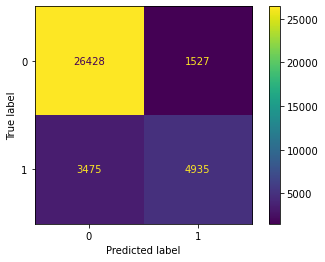

In [61]:
plot_confusion_matrix(model7,x_test,y_test)

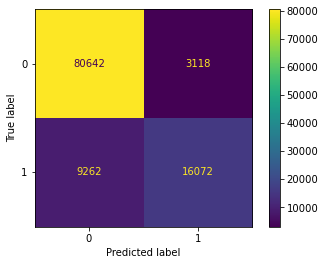

In [62]:
plot_confusion_matrix(model7,x_train,y_train)

In [63]:
Testing_accuracy=(80462+16072)/(9262+80462+16072+3118)
Testing_accuracy

0.8863323356042382

In [64]:
import joblib

In [65]:
joblib.dump(model7,'model.pkl')

['model.pkl']